# Employee Churn Analysis

This dataset consists the data of 15,000 Employees and it has 10 columns each column represent the information about the employee.we'll use the pandas,matplotlib and seaborn for the analysis.


In [1]:
#Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Reading the data
data = pd.read_csv('HR_Data.csv')

In [5]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
Department               14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
data.shape

(14999, 10)

In [8]:
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [10]:
#No. of department in our dataset
data.nunique()

satisfaction_level        92
last_evaluation           65
number_project             6
average_montly_hours     215
time_spend_company         8
Work_accident              2
left                       2
promotion_last_5years      2
Department                10
salary                     3
dtype: int64

In [11]:
data['Department'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: Department, dtype: int64

In [14]:
data['salary'].value_counts()

low       7316
medium    6446
high      1237
Name: salary, dtype: int64

Analysis 1 : Which Department has the highest or lowest salary / Which department pays high

In [15]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


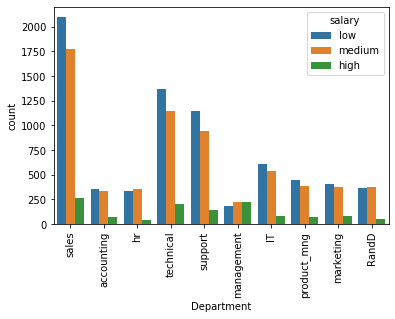

In [17]:
#Visualizing the data using Countplot
plt.figure()
sns.countplot(x='Department',hue='salary',data=data)
plt.xticks(rotation=90)
plt.show()

Analysis 2: How many employees left from the perticular department and from which department highest employees has been left

In [18]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
#Creating separate dataframe for analysis using groupby method
left_data = data.groupby(['Department','left'])['left'].count()

In [25]:
left_data

Department   left
IT           0        954
             1        273
RandD        0        666
             1        121
accounting   0        563
             1        204
hr           0        524
             1        215
management   0        539
             1         91
marketing    0        655
             1        203
product_mng  0        704
             1        198
sales        0       3126
             1       1014
support      0       1674
             1        555
technical    0       2023
             1        697
Name: left, dtype: int64

In [26]:
#Creating dataframe with index label
left_data.unstack()

left,0,1
Department,,
IT,954,273
RandD,666,121
accounting,563,204
hr,524,215
management,539,91
marketing,655,203
product_mng,704,198
sales,3126,1014
support,1674,555


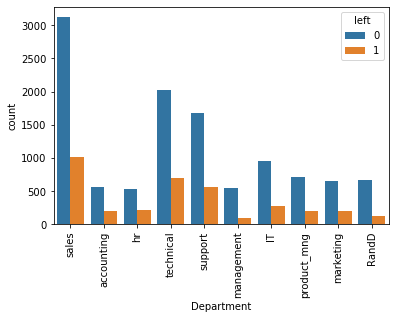

In [30]:
#Visualizaing using countplot
plt.figure()
sns.countplot(x='Department',hue='left',data=data)
plt.xticks(rotation=90)
plt.show()

Analysis 4 : Find why employees leave the job

In [31]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [32]:
#there could be two reason for employee leaving :1. Salary & 2.promotion_last_5years. 
#lets analyze in that perspective.

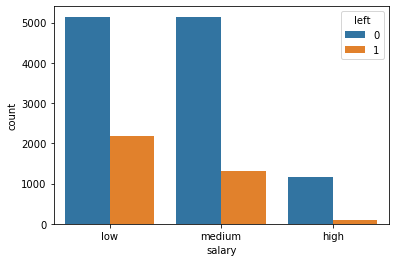

In [33]:
plt.figure()
sns.countplot(x='salary',hue='left',data=data)
plt.show()

In [37]:
#Analyzing using groupby method and then unstacking the data
(data.groupby(['salary','left'])['salary'].count()).unstack()

left,0,1
salary,,
high,1155,82
low,5144,2172
medium,5129,1317


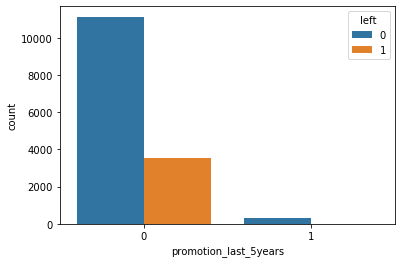

In [38]:
#Visualizaing using countplot
plt.figure()
sns.countplot(x='promotion_last_5years',hue='left',data=data)
plt.show()

In [40]:
#Analyzing using groupby method and then unstacking the data
data.groupby(['promotion_last_5years','left'])['left'].count().unstack()

left,0,1
promotion_last_5years,,
0,11128,3552
1,300,19


Analysis 3: How many employees from the perticular department got the promotion

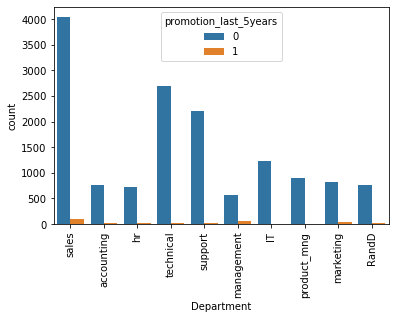

In [43]:
#Visualizaing using countplot
plt.figure()
sns.countplot(x='Department',hue='promotion_last_5years',data=data)
plt.xticks(rotation=90)
plt.show()

In [42]:
#Analyzing using groupby method and then unstacking the data
data.groupby(['Department','promotion_last_5years'])['promotion_last_5years'].count().unstack()

promotion_last_5years,0,1
Department,,
IT,1224.0,3.0
RandD,760.0,27.0
accounting,753.0,14.0
hr,724.0,15.0
management,561.0,69.0
marketing,815.0,43.0
product_mng,902.0,NaN
sales,4040.0,100.0
support,2209.0,20.0


Analysis 5: How many projects are done by perticular department and separate the projects of current employees and left

In [44]:
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [46]:
data.groupby('Department')['number_project'].sum()

Department
IT              4683
RandD           3033
accounting      2934
hr              2701
management      2432
marketing       3164
product_mng     3434
sales          15634
support         8479
technical      10548
Name: number_project, dtype: int64

In [47]:
#Adding one more columns ('left') to analyze no of employees left by department
data.groupby(['Department','left'])['number_project'].sum()

Department   left
IT           0        3584
             1        1099
RandD        0        2546
             1         487
accounting   0        2144
             1         790
hr           0        1940
             1         761
management   0        2055
             1         377
marketing    0        2437
             1         727
product_mng  0        2672
             1         762
sales        0       11845
             1        3789
support      0        6334
             1        2145
technical    0        7717
             1        2831
Name: number_project, dtype: int64